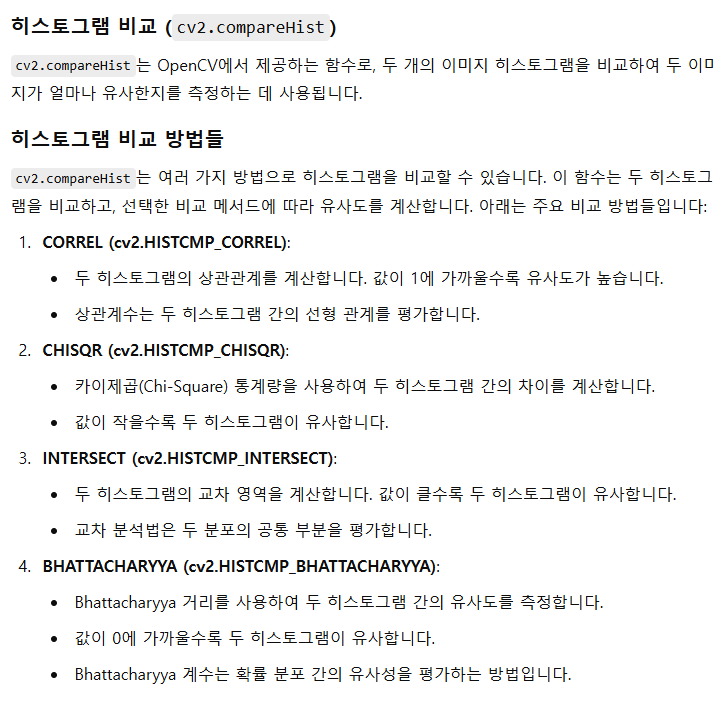

CORREL    	img1:   1.00	img2:   0.70	img3:   0.56	img4:   0.23	
CHISQR    	img1:   0.00	img2:  67.33	img3:  35.71	img4:1129.49	
INTERSECT 	img1:   1.00	img2:   0.54	img3:   0.40	img4:   0.18	
BHATTACHARYYA	img1:   0.00	img2:   0.48	img3:   0.47	img4:   0.79	


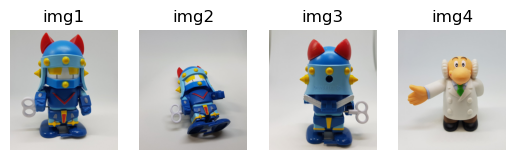

In [2]:
import cv2, numpy as np
import matplotlib.pylab as plt

# 이미지 파일 읽기
img1 = cv2.imread('../img/taekwonv1.jpg')
img2 = cv2.imread('../img/taekwonv2.jpg')
img3 = cv2.imread('../img/taekwonv3.jpg')
img4 = cv2.imread('../img/dr_ochanomizu.jpg')

# 첫 번째 이미지를 'query'라는 이름의 창에 표시
cv2.imshow('query', img1)

# 이미지 리스트와 히스토그램 리스트 초기화
imgs = [img1, img2, img3, img4]
hists = []

# 각 이미지에 대해 반복
for i, img in enumerate(imgs):
    # 서브플롯을 이용해 이미지 표시
    plt.subplot(1, len(imgs), i+1)
    plt.title('img%d' % (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])  # OpenCV는 BGR 형식이므로 RGB로 변환하여 표시

    # ---① 각 이미지를 HSV 색상 공간으로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # ---② H(색상), S(채도) 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

    # ---③ 히스토그램을 0~1 사이 값으로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)

    # 계산된 히스토그램을 리스트에 추가
    hists.append(hist)

# 첫 번째 이미지의 히스토그램을 query로 설정
query = hists[0]

# 히스토그램 비교 방법을 딕셔너리로 정의
methods = {'CORREL' :cv2.HISTCMP_CORREL, 
           'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}

# 각 비교 방법에 대해 반복
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s' % name, end='\t')

    # query와 각 이미지의 히스토그램을 비교
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        # ---④ 선택한 비교 방법에 따라 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        
        # 교차 분석인 경우, 결과를 query 히스토그램의 총합으로 나누어 정규화
        if flag == cv2.HISTCMP_INTERSECT:  
            ret = ret / np.sum(query)

        print("img%d:%7.2f" % (i+1, ret), end='\t')
    print()

# 서브플롯에 그려진 이미지와 히스토그램 비교 결과를 보여줌
plt.show()
cv2.waitKey()  # 키 입력을 기다림
cv2.destroyAllWindows()  # 모든 창 닫기
